# 04 数据分析与可视化
本讲介绍python中常用的数据分析工具包`pandas`，以及可视化包`matplotlib`。

出于篇幅限制，这里只对常用功能做基本介绍，更多内容可以参考官方文档：

* pandas: https://pandas.pydata.org/docs/index.html
* matplotlib: https://matplotlib.org/stable/index.html

In [1]:
# 确保相关的包已经安装
%pip install torch pandas numpy matplotlib openpyxl

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


## 数学基础

$X$和$Y$是2个离散型随机变量，记分布列为$p_X (x)$和$p_Y (y)$，

$(x_1,y_1),(x_2,y_2),...,(x_n,y_n)$是$X$和$Y$的一组观测值/采样/样本，那么有如下定义/结论：

* 期望：$\mathbb{E}[f(X)]=\sum_x f(x) p_X (x)\approx \frac1n \sum_{i=1}^n f(x_i)$，即我们**可以用观测值的平均值来估计期望**

* 均值：$\mu_X=\mathbb{E}[X]$

* 均值的估计：$\hat{\mu}_X= \frac1n \sum_{i=1}^n x_i$，可以证明$\mathbb{E}[\hat{\mu}_X]=\mu_X$（满足这种性质的称为**无偏估计**）

* 方差：$\sigma_X^2=\mathbb{E}[(X-\mu_X)^2]=\mathbb{E}[X^2]-\mu_X^2$

* 方差的估计：有两种常见形式
  * $\hat{\sigma}_X^2=\frac1n \sum_{i=1}^n (x_i-\hat{\mu}_X)^2$，是这组观测值的方差
  * $\hat{\sigma}_X^2=\frac1{n-1} \sum_{i=1}^n (x_i-\hat{\mu}_X)^2$，**注意这里的分母是n-1**，可以证明它是随机变量$X$的方差$\sigma_X^2$的无偏估计

> 注：对于`观测值的方差`、`随机变量的方差`、`随机变量的方差的估计`可以通过如下的例子理解，假设我们抛一枚均匀硬币，正面记为1反面记为0，我们用随机变量$X$表示抛硬币的结果，可以算出$\sigma_X^2=0.25$，这与观测值无关；假设我们抛4次得到 $1,0,1,1$，那么我们可以算出这组观测值的方差为$0.1875$，我们可以用这个数作为$\sigma_X^2$的估计值；衡量一个估计方法的好坏的指标之一是它是否是**无偏的**，即估计值的期望是否等于被估计的对象，在数学上可以证明，将样本方差乘上$\frac{n}{n-1}$才是$\sigma_X^2$的无偏估计，即上述的第二种形式。

* 协方差：$Cov(X,Y)=\mathbb{E}[(X-\mu_X)(Y-\mu_Y)]=\mathbb{E}[XY]-\mu_X\mu_Y$
  
* 协方差的估计：与方差类似，有两种常见形式
  * $\widehat{Cov}(X,Y)=\frac1n \sum_{i=1}^n (x_i-\hat{\mu}_X)(y_i-\hat{\mu}_Y)$，是这组观测值的协方差
  * $\widehat{Cov}(X,Y)=\frac1{n-1} \sum_{i=1}^n (x_i-\hat{\mu}_X)(y_i-\hat{\mu}_Y)$，是$Cov(X,Y)$的无偏估计

* 协方差矩阵：如果有一组随机变量，比如$A,B,C,D$，我们可以画一个4x4的表格，里面填写两两的协方差，称为协方差矩阵

  | | A | B | C | D |
  |-|-|-|-|-|
  |**A**|$Cov(A,A)$|$Cov(A,B)$|$Cov(A,C)$|$Cov(A,D)$|
  |**B**|$Cov(B,A)$|$Cov(B,B)$|$Cov(B,C)$|$Cov(B,D)$|
  |**C**|$Cov(C,A)$|$Cov(C,B)$|$Cov(C,C)$|$Cov(C,D)$|
  |**D**|$Cov(D,A)$|$Cov(D,B)$|$Cov(D,C)$|$Cov(D,D)$|
  

* 熵：$Ent(X)=\mathbb{E}[-\log p_X(X)]=\sum_x - p_X (x)\log p_X (x)$
  
* 熵的估计
  * 根据样本的值估计分布列：$\hat{p}_X(x)=\frac1n |\{x_i|x_i=x,i=1,2,...,n\}|$
  * 估计熵：$\widehat{Ent}(X)=\sum_x - \hat{p}_X (x)\log \hat{p}_X (x)$

## pandas

可以很方便地处理序列/表格类型的数据，在很多语法上与`numpy`类似(二者的数据也可以相互转化)

In [2]:
# 导入
import pandas as pd
import numpy as np

### 基本对象

* `pd.Series`：存放序列类型的数据，内部元素类型相同
* `pd.DataFrame`：存放表格类型的数据，内部同一列的元素类型相同，不同列可以不同

需要注意的是，上述两个对象都有`索引`的概念，类似于Excel表格最左侧的标号，默认的索引是从0开始递增编号，也可以手动设置其他索引。

In [3]:
# 从list创建Series
pd.Series([1, 3, 5, np.nan, 6, 8])

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

上面显示的结果有两列，第一列是自动创建的索引，第二列是我们的数据

In [4]:
# 也可以是numpy数组

# 创建numpy数组
x=np.array([1, 3, 5, np.nan, 6, 8])
print(x)
print()

# 创建Series
y=pd.Series(x)
print(y)
print()

# 转回numpy数组
z=y.to_numpy()
print(z)

[ 1.  3.  5. nan  6.  8.]

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

[ 1.  3.  5. nan  6.  8.]


In [5]:
# 手动设置索引
pd.Series(
    [1, 3, 5, np.nan, 6, 8],
    index=[2,4,6,8,10,12]
)

2     1.0
4     3.0
6     5.0
8     NaN
10    6.0
12    8.0
dtype: float64

In [6]:
# 创建副本

# 下面这样a和b是共享数据的，改任何一个，另一个也会变
a=np.array([1,2,3])
b=pd.Series(a)
a[0]=4
print(a)
print(b)

print()

# 下面创建了一个副本，和原对象不共享数据
b=b.copy()
a[0]=5
print(a)
print(b)

[4 2 3]
0    4
1    2
2    3
dtype: int32

[5 2 3]
0    4
1    2
2    3
dtype: int32


In [7]:
# 从二维数组创建DataFrame
df=pd.DataFrame(
    data=np.random.randn(6, 4), # 随机生成6行4列的数据
    columns=['A','B','C','D']   # 每一列的名字
)
#
df

,A,B,C,D
0,-1.430240,-0.351973,1.537758,0.430499
1,1.413424,-0.647241,-0.258330,0.473224
2,0.176440,0.235368,-0.203673,-0.311527
3,0.990517,-2.144858,1.021779,-0.511115
4,0.319981,0.206065,2.429571,-1.406542
5,-0.809876,-1.870784,0.890072,0.814655


In [8]:
# 查看每列的名称
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [9]:
# 同样可以转numpy
df.to_numpy()

array([[-1.43024013, -0.35197297,  1.53775846,  0.43049913],
       [ 1.41342385, -0.64724144, -0.25833028,  0.47322422],
       [ 0.17644005,  0.23536775, -0.20367268, -0.3115271 ],
       [ 0.99051691, -2.14485832,  1.02177919, -0.51111482],
       [ 0.31998073,  0.20606458,  2.42957149, -1.40654206],
       [-0.80987615, -1.87078386,  0.89007172,  0.81465498]])

In [10]:
# 也可以创建副本
df.copy()

,A,B,C,D
0,-1.430240,-0.351973,1.537758,0.430499
1,1.413424,-0.647241,-0.258330,0.473224
2,0.176440,0.235368,-0.203673,-0.311527
3,0.990517,-2.144858,1.021779,-0.511115
4,0.319981,0.206065,2.429571,-1.406542
5,-0.809876,-1.870784,0.890072,0.814655


In [11]:
# 从字典创建DataFrame，字典的每一项对应一列，每一列的长度要么相同，要么是1（会自动重复）
df=pd.DataFrame(
    {
        # 可以是单个数值
        "A": 1.0,
        # 可以是单个时间戳
        "B": pd.Timestamp("20130102"),
        # 可以是单个字符串
        "C": "foo",
        # 可以是Series
        "D": pd.Series([1,2,3,4]),
        # 可以是numpy数组
        "E": np.array([5,6,7,8]),
    }
)
#
df

,A,B,C,D,E
0,1.0,2013-01-02,foo,1,5
1,1.0,2013-01-02,foo,2,6
2,1.0,2013-01-02,foo,3,7
3,1.0,2013-01-02,foo,4,8


In [12]:
# 添加一列（类似字典）
df['G']=[1,2,3,4]
df

,A,B,C,D,E,G
0,1.0,2013-01-02,foo,1,5,1
1,1.0,2013-01-02,foo,2,6,2
2,1.0,2013-01-02,foo,3,7,3
3,1.0,2013-01-02,foo,4,8,4


In [13]:
# 查看每一列的类型
df.dtypes

A           float64
B    datetime64[ns]
C            object
D             int64
E             int32
G             int64
dtype: object

### 查看数据

In [14]:
# 创建一个很长的表格
df=pd.DataFrame(
    data=np.random.randn(1000, 4),  # 随机生成1000行4列的数据
    columns=['A','B','C','D']       # 每一列的名字
)

In [15]:
# 查看前3行
df.head(3)

,A,B,C,D
0,-1.824090,0.140661,1.349008,-0.031655
1,1.697664,0.544551,0.363717,0.132506
2,-0.402926,-1.218600,-0.367278,-1.238371


In [16]:
# 查看后3行
df.tail(3)

,A,B,C,D
997,1.300377,1.369309,-0.338852,-1.241352
998,-1.151646,-0.141125,-0.489147,-0.124069
999,0.070841,-0.037072,-0.055518,0.438940


In [17]:
# 查看基本统计数据
df.describe()

,A,B,C,D
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.003378,-0.016538,0.041141,0.018646
std,0.968256,1.013031,1.007623,1.015388
min,-2.992684,-3.210062,-2.914439,-3.995988
25%,-0.639725,-0.684567,-0.659177,-0.647919
50%,0.016264,-0.018386,0.075999,0.043004
75%,0.609073,0.690928,0.703098,0.705847
max,3.179194,2.718334,3.721377,3.207287


### 索引

In [18]:
# 创建示例表格
df=pd.DataFrame(
    data=np.random.randn(6, 4),                 # 随机生成6行4列的数据
    columns=['A','B','C','D'],                  # 每一列的名字
    index=pd.date_range("20240101", periods=6)  # 以日期为索引
)
#
df

,A,B,C,D
2024-01-01,-0.573178,0.433490,-1.584070,-0.117912
2024-01-02,-0.483954,-0.567254,1.298049,-0.475543
2024-01-03,0.110453,-0.868183,0.501859,0.668543
2024-01-04,-0.742763,1.873936,1.064987,0.498153
2024-01-05,-0.394985,-1.549535,2.063619,-0.421253
2024-01-06,-0.343167,0.624994,-0.653021,-0.685964


In [19]:
# 按列的名称索引
df['A']

2024-01-01   -0.573178
2024-01-02   -0.483954
2024-01-03    0.110453
2024-01-04   -0.742763
2024-01-05   -0.394985
2024-01-06   -0.343167
Freq: D, Name: A, dtype: float64

In [20]:
# 按行索引
df[1:3]

,A,B,C,D
2024-01-02,-0.483954,-0.567254,1.298049,-0.475543
2024-01-03,0.110453,-0.868183,0.501859,0.668543


In [21]:
# 按行/列的名称索引
# 类似numpy，第一维索引是行，第二维索引是列

# 选中一行
print(df.loc['20240101'])
print()

# 选中一列
print(df.loc[:,'A'])
print()

# 选中矩形区域
print(df.loc['20240101':'20240103','A':'C']) # 注意：这里是左闭右闭
print()

# 选择多列
print(df.loc[:,['B','D']])

A   -0.573178
B    0.433490
C   -1.584070
D   -0.117912
Name: 2024-01-01 00:00:00, dtype: float64

2024-01-01   -0.573178
2024-01-02   -0.483954
2024-01-03    0.110453
2024-01-04   -0.742763
2024-01-05   -0.394985
2024-01-06   -0.343167
Freq: D, Name: A, dtype: float64

                   A         B         C
2024-01-01 -0.573178  0.433490 -1.584070
2024-01-02 -0.483954 -0.567254  1.298049
2024-01-03  0.110453 -0.868183  0.501859

                   B         D
2024-01-01  0.433490 -0.117912
2024-01-02 -0.567254 -0.475543
2024-01-03 -0.868183  0.668543
2024-01-04  1.873936  0.498153
2024-01-05 -1.549535 -0.421253
2024-01-06  0.624994 -0.685964


In [22]:
# 按行/列的下标索引
# 和上面的类似，只是把名称换成了下标
print(df.iloc[0])
print()
print(df.iloc[:,0])
print()
print(df.iloc[:4,:3]) # 正常的左闭右开
print()
print(df.iloc[:,[1,3]])

A   -0.573178
B    0.433490
C   -1.584070
D   -0.117912
Name: 2024-01-01 00:00:00, dtype: float64

2024-01-01   -0.573178
2024-01-02   -0.483954
2024-01-03    0.110453
2024-01-04   -0.742763
2024-01-05   -0.394985
2024-01-06   -0.343167
Freq: D, Name: A, dtype: float64

                   A         B         C
2024-01-01 -0.573178  0.433490 -1.584070
2024-01-02 -0.483954 -0.567254  1.298049
2024-01-03  0.110453 -0.868183  0.501859
2024-01-04 -0.742763  1.873936  1.064987

                   B         D
2024-01-01  0.433490 -0.117912
2024-01-02 -0.567254 -0.475543
2024-01-03 -0.868183  0.668543
2024-01-04  1.873936  0.498153
2024-01-05 -1.549535 -0.421253
2024-01-06  0.624994 -0.685964


In [23]:
# 条件(布尔)索引
df[df['A']>0]

,A,B,C,D
2024-01-03,0.110453,-0.868183,0.501859,0.668543


In [24]:
# 按行迭代
for i in df.itertuples():
    print(i[0],i[1],i[2],i[3],i[4])

2024-01-01 00:00:00 -0.5731778603887853 0.4334895800333886 -1.5840697705556055 -0.11791186609327024
2024-01-02 00:00:00 -0.4839541561825529 -0.5672542526831734 1.2980493575844017 -0.4755428528881236
2024-01-03 00:00:00 0.11045258120665034 -0.8681829262356386 0.501859203040507 0.6685425408552033
2024-01-04 00:00:00 -0.742763030802587 1.873935898457283 1.0649868417979316 0.49815341952192577
2024-01-05 00:00:00 -0.3949850532237989 -1.5495350637216005 2.0636186443481086 -0.42125337460850365
2024-01-06 00:00:00 -0.34316712221329604 0.6249935526309061 -0.6530212923643578 -0.6859635378412522


### 运算

In [25]:
# 均值
print(df.mean())
print()
# 标准差
print(df.std())
print()
# 协方差
print(df.cov())

A   -0.404599
B   -0.008759
C    0.448570
D   -0.088996
dtype: float64

A    0.289211
B    1.230145
C    1.345952
D    0.554189
dtype: float64

          A         B         C         D
A  0.083643 -0.217084  0.008420  0.037460
B -0.217084  1.513257 -0.689040  0.158216
C  0.008420 -0.689040  1.811587  0.050742
D  0.037460  0.158216  0.050742  0.307126


In [26]:
# 和numpy一样，Series/DataFrame也可以做四则运算
# 例子：归一化
print((df-df.mean())/df.std())

                   A         B         C         D
2024-01-01 -0.582892  0.359509 -1.510188 -0.052177
2024-01-02 -0.274384 -0.454008  0.631136 -0.697500
2024-01-03  1.780885 -0.698636  0.039592  1.366931
2024-01-04 -1.169263  1.530466  0.457978  1.059474
2024-01-05  0.033242 -1.252516  1.199930 -0.599538
2024-01-06  0.212412  0.515185 -0.818448 -1.077191


**注意：`pandas`、`numpy`、`pytorch`在计算标准差/方差时的默认分母不同**

In [27]:
import torch
x=[1., -1.]

print(pd.Series(x).var(ddof=0)) # 除以n
print(pd.Series(x).var())       # 除以n-1

print(np.array(x).var())        # 除以n
print(np.array(x).var(ddof=1))  # 除以n-1

print(torch.tensor(x).var(unbiased=False))  # 除以n
print(torch.tensor(x).var())                # 除以n-1

1.0
2.0
1.0
2.0
tensor(1.)
tensor(2.)


In [28]:
# 位移

x=pd.Series(range(6))
print(x)
print()

x=x.shift(2) # 向后移动2位
print(x)

0    0
1    1
2    2
3    3
4    4
5    5
dtype: int64

0    NaN
1    NaN
2    0.0
3    1.0
4    2.0
5    3.0
dtype: float64


In [29]:
# 位移之后出现的空位会填充为NaN
# 我们可以将它替换为0
print(x.fillna(0))
print()
# 也可以直接去掉
print(x.dropna())

0    0.0
1    0.0
2    0.0
3    1.0
4    2.0
5    3.0
dtype: float64

2    0.0
3    1.0
4    2.0
5    3.0
dtype: float64


### 其他操作

In [30]:
# 计数
pd.Series(['A','B','C','A','A','B']).value_counts()

A    3
B    2
C    1
Name: count, dtype: int64

In [31]:
# 排序

# 示例表格
df=pd.DataFrame(
    data=np.random.randn(4, 4),                 # 随机生成4行4列的数据
    columns=['A','B','C','D'],                  # 每一列的名字
)
print(df)
print()

# 按B列升序排序
print(df.sort_values(by='B'))
print()

# 按B列降序排序
print(df.sort_values(by='B',ascending=False))
print()

          A         B         C         D
0  0.244040 -0.384509 -0.596314  0.076243
1 -0.415873  1.142108  1.199271  0.150777
2  1.702528 -0.572390  1.318563  1.248697
3 -1.318031  0.115010  0.236954  0.429226

          A         B         C         D
2  1.702528 -0.572390  1.318563  1.248697
0  0.244040 -0.384509 -0.596314  0.076243
3 -1.318031  0.115010  0.236954  0.429226
1 -0.415873  1.142108  1.199271  0.150777

          A         B         C         D
1 -0.415873  1.142108  1.199271  0.150777
3 -1.318031  0.115010  0.236954  0.429226
0  0.244040 -0.384509 -0.596314  0.076243
2  1.702528 -0.572390  1.318563  1.248697



In [32]:
# 纵向拼接表格
a=pd.DataFrame({
    'A':[1,2,3],
    'B':[4,5,6]
})
b=pd.DataFrame({
    'A':[7,8,9],
    'B':[10,11,12]
})
x=pd.concat([a,b])
print(x)
print()
# 重新编号索引
print(x.reset_index(drop=True))

   A   B
0  1   4
1  2   5
2  3   6
0  7  10
1  8  11
2  9  12

   A   B
0  1   4
1  2   5
2  3   6
3  7  10
4  8  11
5  9  12


In [33]:
# 横向合并两个表

# 直接拼接
a=pd.DataFrame({
    'A':[1,2,3],
})
b=pd.DataFrame({
    'B':[4,5,6]
})
x=pd.concat([a,b],axis=1)
print(x)

   A  B
0  1  4
1  2  5
2  3  6


In [34]:
# 按共有列的值拼接
x=pd.DataFrame({
    'Name':['A','B','C'],
    'ID':[1,2,3]
})
y=pd.DataFrame({
    'ID':[1,1,2,2,3,3],
    'Course':['AA','BB']*3,
    'Score':range(90,96)
})
print(x)
print()
print(y)
print()
# 根据ID这一列的值合并
print(x.merge(y,on='ID'))

  Name  ID
0    A   1
1    B   2
2    C   3

   ID Course  Score
0   1     AA     90
1   1     BB     91
2   2     AA     92
3   2     BB     93
4   3     AA     94
5   3     BB     95

  Name  ID Course  Score
0    A   1     AA     90
1    A   1     BB     91
2    B   2     AA     92
3    B   2     BB     93
4    C   3     AA     94
5    C   3     BB     95


In [35]:
# 分组聚合
# 根据某一列的值将行分为若干组，对每一组计算某种聚合操作
# 例如：mean均值、std标准差、sum求和
df=pd.DataFrame({
    'A':['a','a','a','b','b','c'],
    'B':range(6),
    'C':range(6,12)
})
print(df)
print()

# 分组计算平均值（注意这样操作后列A成为了index）
df.groupby('A').mean()

   A  B   C
0  a  0   6
1  a  1   7
2  a  2   8
3  b  3   9
4  b  4  10
5  c  5  11



,B,C
A,,
a,1.0,7.0
b,3.5,9.5
c,5.0,11.0


In [36]:
# 分组后的结果也可以做索引
# 例如只对C这一列计算均值
df.groupby('A')['C'].mean()

A
a     7.0
b     9.5
c    11.0
Name: C, dtype: float64

In [37]:
# 将表格改为按行和列索引

# 比如前面我们给出了每个学生每门课的成绩
x=pd.DataFrame({
    'ID':[1,1,2,2,3,3],
    'Course':['AA','BB']*3,
    'Score':range(90,96)
})
print(x)
print()
# 我们想将它改为“每一行是一个学生、每一列是一门科目、中间填写成绩”的形式
print(x.pivot(index='ID',columns='Course',values='Score'))

   ID Course  Score
0   1     AA     90
1   1     BB     91
2   2     AA     92
3   2     BB     93
4   3     AA     94
5   3     BB     95

Course  AA  BB
ID            
1       90  91
2       92  93
3       94  95


### 输入/输出

pandas支持多种格式的输入输出，常用的是pickle、csv、excel

更多参见 https://pandas.pydata.org/docs/user_guide/io.html#io

In [38]:
# CSV格式：用逗号分隔的纯文本文件
# 写
df.to_csv('test.csv')
# 读
df=pd.read_csv('test.csv')

# Excel表格
# 写
df.to_excel('test.xlsx')
# 读
df=pd.read_excel('test.xlsx')

# pickle：python的存档格式，几乎可以保存恢复任意数据
# 写
df.to_pickle('test.pkl')
# 读
df=pd.read_pickle('test.pkl')

## matplotlib

本章介绍基础绘图应用，只涉及`matplotlib.pyplot`，可以涵盖大部分日常使用场景

In [39]:
import matplotlib.pyplot as plt

### 图像显示

后续介绍的`plt.plot`等函数，都是在 **当前图表(figure)** 上进行绘制，这意味着如果我们绘制多个对象，它们会显示在同一张图表上。

如果想分开绘制多个图表，有如下两种方式

#### 方式1：使用`plt.figure`手动创建新图表
```python
# 图表1
# 不需要额外操作，因为初始会自动创建图表
# 绘图
plt.plot(...)

# 图表2
# 创建一个新图表
plt.figure()
# 绘图
plt.plot(...)

# 显示所有图表
# - 如果是在python脚本(xxx.py)中运行，会弹出多个窗口，每个窗口对应一个图表，并且可以交互（缩放、平移）
# - 如果是在jupyter notebook中运行，不会弹出窗口，而是在输出中显示图表，不可交互
plt.show()
```
**注：在python脚本中，`plt.show()`默认是会阻塞程序运行的，即仅当所有窗口都被关闭后，才会继续执行后面的代码。**

#### 方式2：使用`plt.show`自动创建新图表
```python
# 图表1
plt.plot(...)
# 显示图表1
plt.show()

# 图表2
plt.plot(...)
# 显示图表2
plt.show()
```
这种方式的原理是，在显示完图表1后，它会自动创建新的图表，于是我们就可以在新的图表上绘图了，无需手动创建新图表。

对于jupyter notebook来说，上述两种方式效果相同；

但对于python脚本，方式1会一次性显示两个窗口，方式2会先显示一个窗口，等用户关闭这个窗口后再显示第二个窗口。

#### 绘制折线图

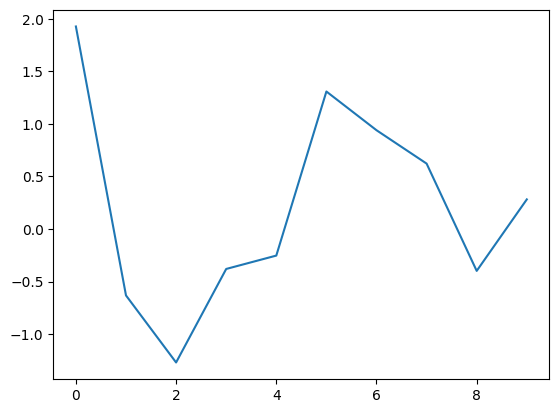

In [40]:
# 绘制y，默认x是0,1,2,...
y=np.random.randn(10)
plt.plot(y)

# 显示图像（在jupyter notebook中通常默认会显示，因此后续代码中会省略这一句）
plt.show()

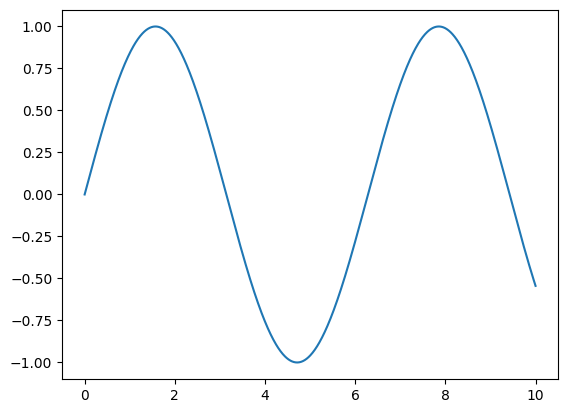

In [41]:
# 同时指定x和y
x=np.linspace(0,10,1000)
y=np.sin(x)
plt.plot(x,y)

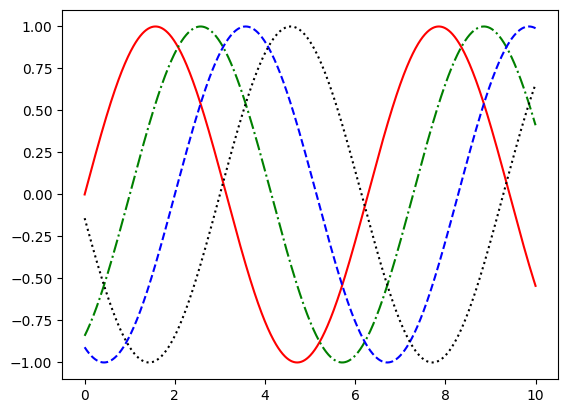

In [42]:
# 使用不同的样式
# 简单的样式是一个字符串，用[颜色]+[曲线类型]表示，曲线类型不写默认是直线
# 颜色：r/g/b/y/k 对应 红/绿/蓝/黄/黑
# 曲线类型："-." / "--" / ":" 对应 点划线/虚线/点线

x=np.linspace(0,10,1000)
plt.plot(x,np.sin(x),'r')
plt.plot(x,np.sin(x-1),'g-.')
plt.plot(x,np.sin(x-2),'b--')
plt.plot(x,np.sin(x-3),'k:')

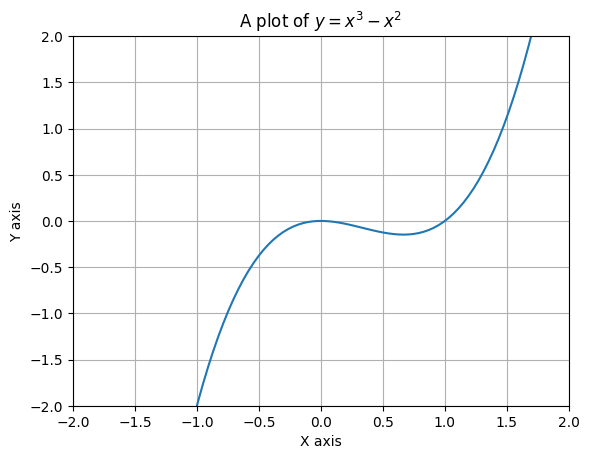

In [43]:
# 加标题
# 用$$可以写latex公式

x=np.linspace(-2,2,100)
plt.plot(x,x**3-x**2)
# 图表标题
plt.title('A plot of $y=x^3-x^2$')
# x轴标题
plt.xlabel('X axis')
# y轴标题
plt.ylabel('Y axis')

# 限制范围
# x的绘制范围
plt.xlim(-2,2)
# y的绘制范围
plt.ylim(-2,2)

# 开启网格显示
plt.grid()

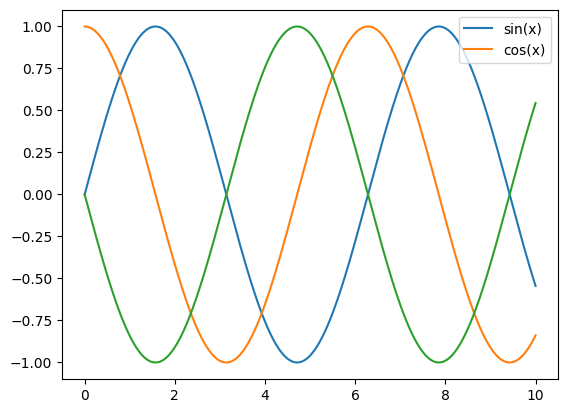

In [44]:
# 设置图例

x=np.linspace(0,10,1000)

# 注意下面写了label参数
plt.plot(x,np.sin(x),label='sin(x)')
plt.plot(x,np.cos(x),label='cos(x)')

# 注意下面没写label参数
plt.plot(x,-np.sin(x))

# 显示图例（没有加label参数的曲线不会出现在图例中）
plt.legend()

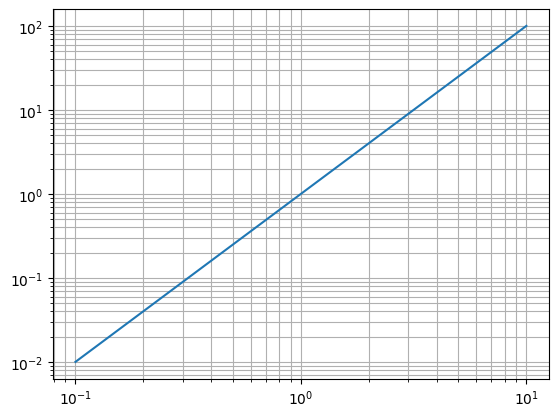

In [45]:
# 使用对数坐标

x=np.linspace(0.1,10,100)
y=x*x
plt.plot(x,y)

# x使用对数坐标
plt.xscale('log')

# y使用对数坐标
plt.yscale('log')

# 在大小刻度上都显示网格
plt.grid(which='both')

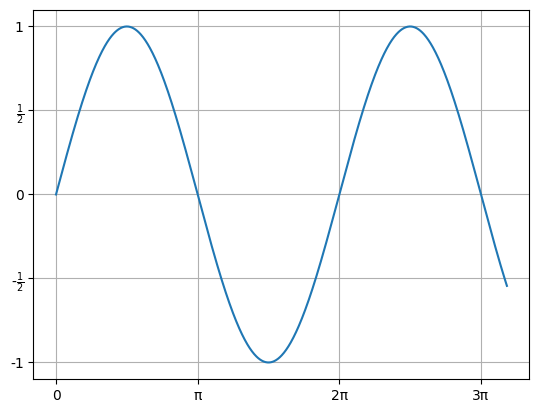

In [46]:
# 自定义刻度位置和文本
x=np.linspace(0,10,1000)
plt.plot(x,np.sin(x))
# x轴刻度位置和文本
plt.xticks([0,np.pi,2*np.pi,3*np.pi],['0','π','2π','3π'])
# y轴
plt.yticks([-1,-0.5,0,0.5,1],['-1',r'-$\frac{1}{2}$','0',r'$\frac{1}{2}$','1'])
plt.grid()

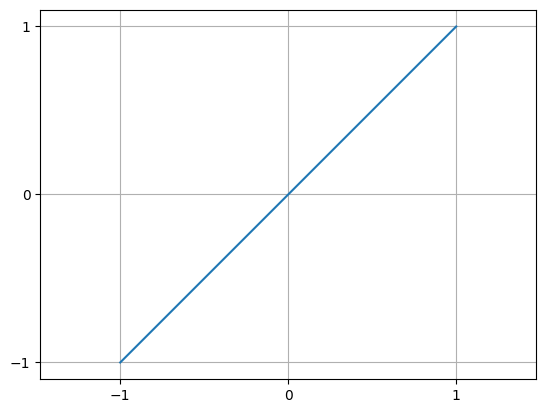

In [47]:
# 让xy轴比例相等
x=np.linspace(-1,1,2)
plt.plot(x,x)

plt.axis('equal') # ←

plt.xticks([-1,0,1])
plt.yticks([-1,0,1])
plt.grid()

#### 填充

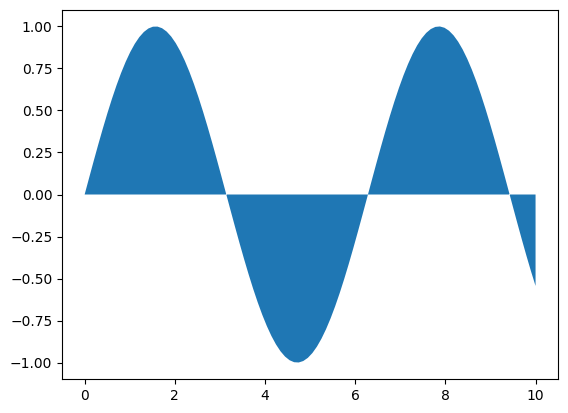

In [48]:
x=np.linspace(0,10,100)
y1=np.sin(x)
y2=np.cos(x)

# 填充曲线和x轴之间的区域
plt.fill_between(x,y1)

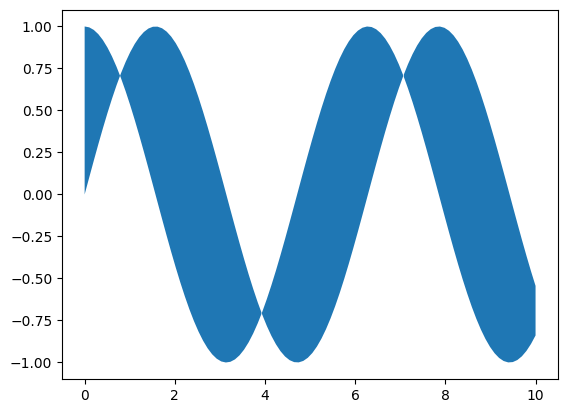

In [49]:
# 填充两条曲线之间的区域
plt.fill_between(x,y1,y2)

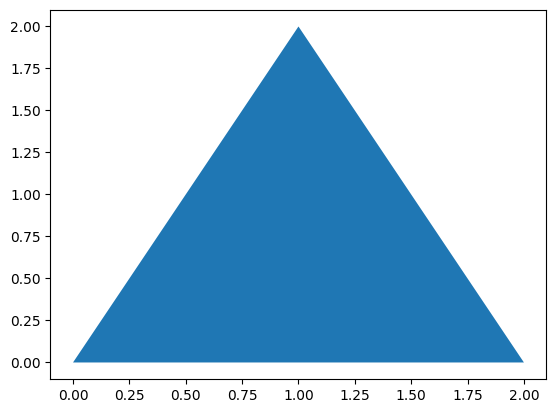

In [50]:
# 填充封闭曲线
plt.fill(
    [0,2,1],
    [0,0,2]
)

#### 绘制散点图

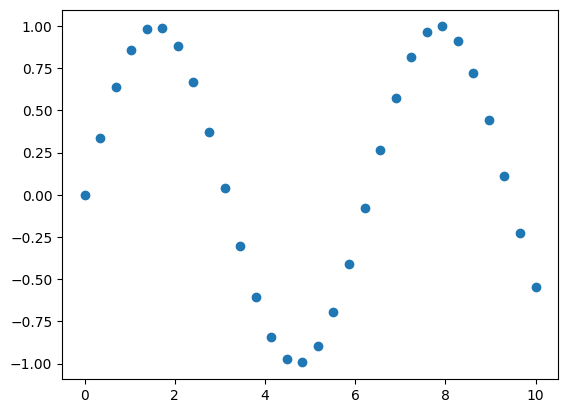

In [51]:
x=np.linspace(0,10,30)
y=np.sin(x)
plt.scatter(x,y)

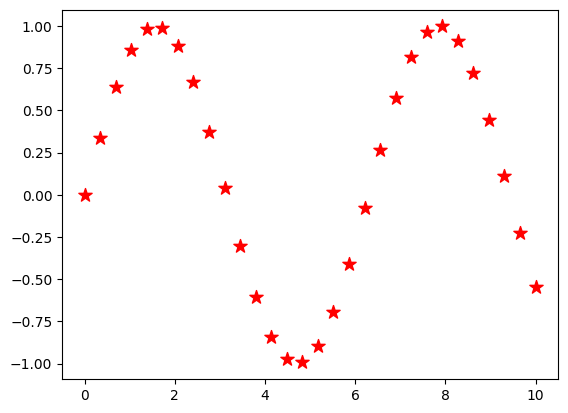

In [52]:
# 设置不同格式
plt.scatter(
    x,
    y,
    s=100,       # 大小
    color='red', # 颜色
    marker='*',  # 图案，参见 https://matplotlib.org/stable/api/markers_api.html
)

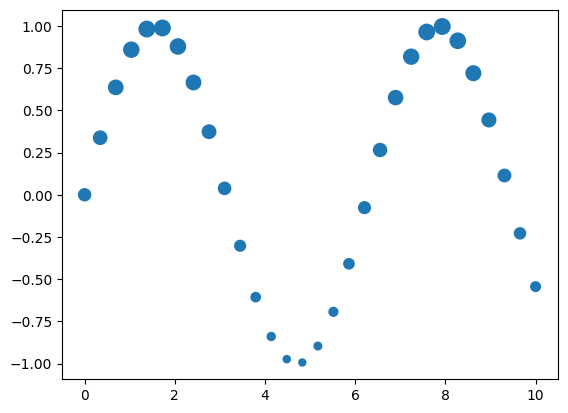

In [53]:
# 每个点的大小可以不同
x=np.linspace(0,10,30)
y=np.sin(x)
s=(1.5+np.sin(x))*50
plt.scatter(x,y,s)   # s参数控制大小

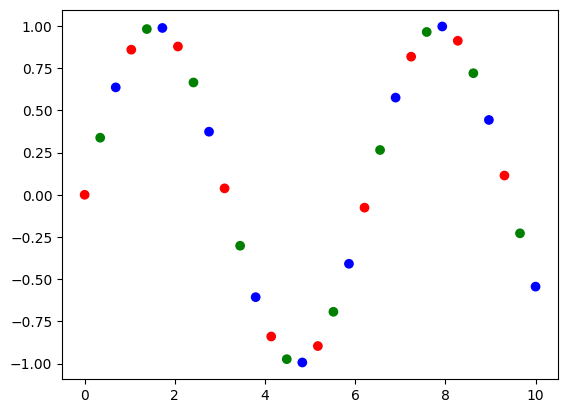

In [54]:
# 每个点的颜色可以不同
x=np.linspace(0,10,30)
y=np.sin(x)

# 手动指定颜色
plt.scatter(x,y,color=['red','green','blue']*10)

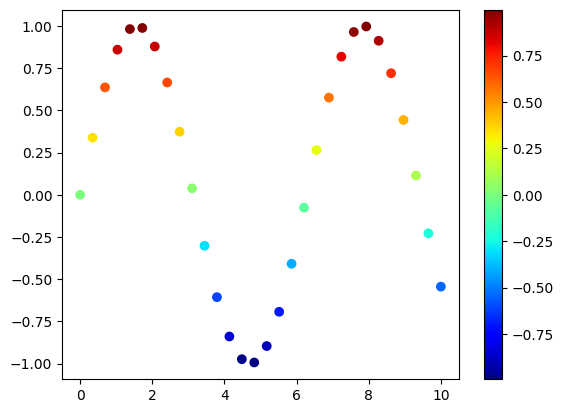

In [55]:
# 用数值表示颜色
# 具体的颜色取决于cmap(colormap)
# 常用的cmap有 jet彩虹色、gray黑白灰，更多选择参见 https://matplotlib.org/stable/users/explain/colors/colormaps.html
c=np.sin(x)
plt.scatter(
    x,
    y,
    c=c, # 数值颜色
    cmap='jet'
)

# 显示colormap
plt.colorbar()

#### 绘制柱状图

<BarContainer object of 3 artists>

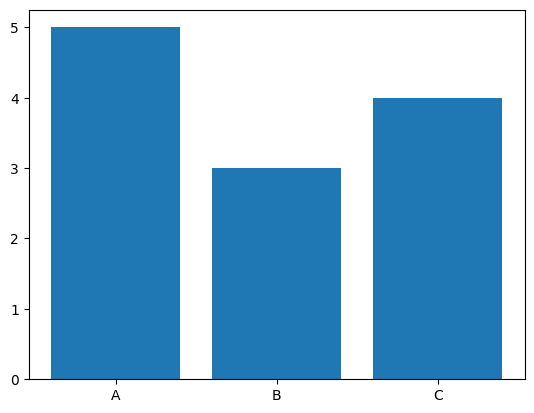

In [56]:
plt.bar(
    ['A','B','C'], # x可以是非数字
    [5,3,4]
)

#### 绘制直方图

(array([  3.,   4.,  12.,  13.,  20.,  57.,  68.,  98., 110., 127., 110.,
        105.,  89.,  64.,  41.,  34.,  18.,  12.,   7.,   3.]),
 array([-3. , -2.7, -2.4, -2.1, -1.8, -1.5, -1.2, -0.9, -0.6, -0.3,  0. ,
         0.3,  0.6,  0.9,  1.2,  1.5,  1.8,  2.1,  2.4,  2.7,  3. ]),
 <BarContainer object of 20 artists>)

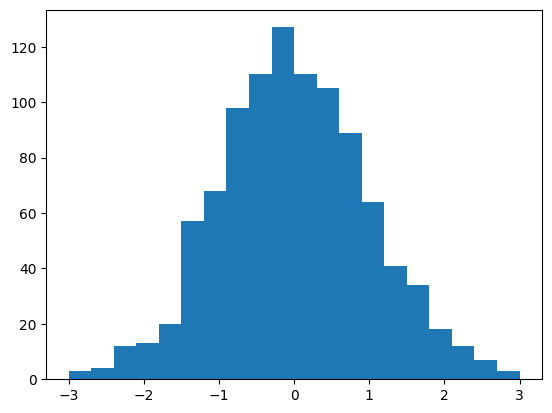

In [57]:
x=np.random.randn(1000)
plt.hist(
    x,
    range=(-3,3),   # 可选，指定数据范围
    bins=20,        # 可选，指定柱子个数
)

#### 绘制文本

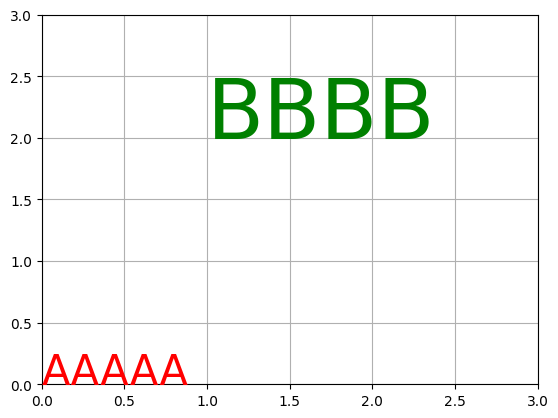

In [58]:
plt.text(
    0,0,        # 文本左下角坐标
    s='AAAAA',  # 文本内容
    size=30,    # 文本大小
    color='red' # 文本颜色
)

plt.text(
    1,2,          # 文本左下角坐标
    s='BBBB',     # 文本内容
    size=60,      # 文本大小
    color='green' # 文本颜色
)

# 它不会根据文本自动调整画面大小，需要我们手动设置
plt.xlim(0,3)
plt.ylim(0,3)

plt.grid()

#### 绘制图像

(747, 859, 3)


(-0.5, 858.5, 746.5, -0.5)

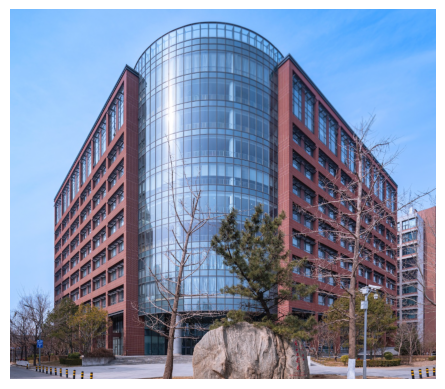

In [59]:
# 加载一张彩色图像
data=np.load('data/image.npy')
# 它的形状是 高x宽x3，3是因为它具有RGB三个颜色通道
print(data.shape)
# 绘制
plt.imshow(data)
# 不显示坐标轴
plt.axis('off')

(747, 859)


(-0.5, 858.5, 746.5, -0.5)

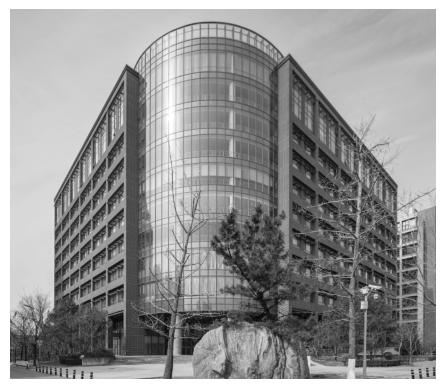

In [60]:
# 绘制单色图像

# 将数据转为单通道
x=data.mean(-1)
print(x.shape)

# 指定cmap
plt.imshow(x,cmap='gray')
plt.axis('off')

#### 绘制多个子图

使用`plt.subplot(x,y,i)`函数设置当前的子图表位置

含义是，把当前的整个图切成`x`行`y`列，在第`i`块的位置绘制子图，`i`**从1开始计数**

可以结合下面的例子理解

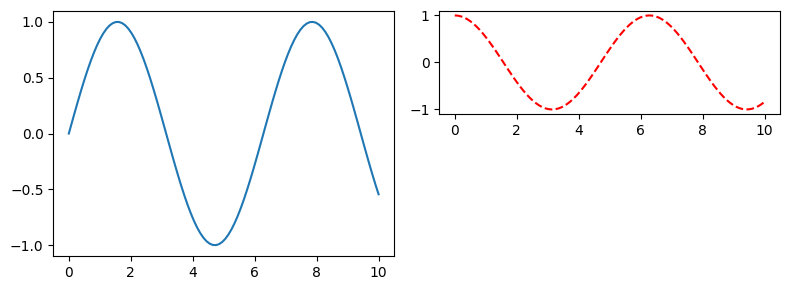

In [61]:
x=np.linspace(0,10,100)

# 1行2列中的第1个
plt.subplot(1,2,1)
plt.plot(x,np.sin(x))

# 2行2列中的第2个
plt.subplot(2,2,2)
plt.plot(x,np.cos(x),'r--')

# 调整整体尺寸，宽为8，高为3
plt.gcf().set_size_inches(8,3)

# 自动调整间距
plt.tight_layout()

解释如下图所示：

![image](./images/fig1.png)

想重叠也是可以的

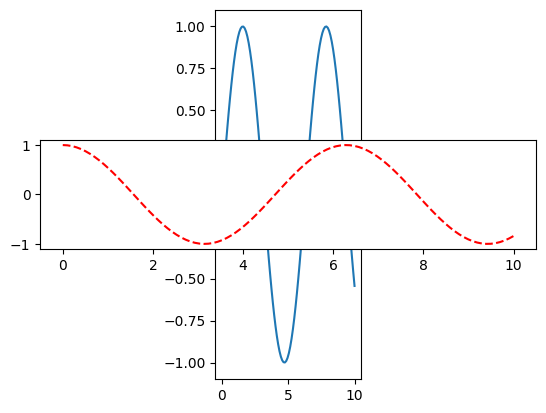

In [62]:
x=np.linspace(0,10,100)

# 1行3列中的第2个
plt.subplot(1,3,2)
plt.plot(x,np.sin(x))

# 3行1列中的第2个
plt.subplot(3,1,2)
plt.plot(x,np.cos(x),'r--')

解释如下图所示：

![image](./images/fig2.png)

#### 保存图像

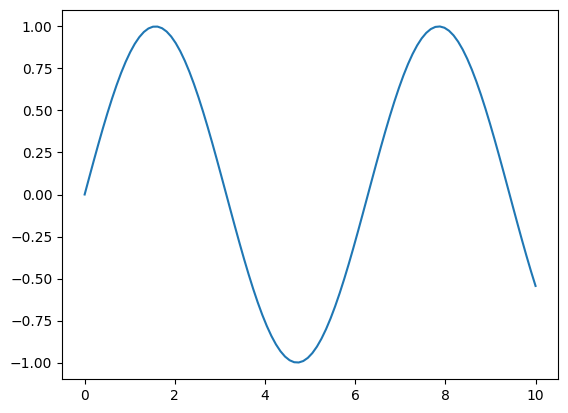

In [63]:
x=np.linspace(0,10,100)
plt.plot(x,np.sin(x))

# 保存为png图像
plt.savefig('test.png')
# 保存为pdf
plt.savefig('test.pdf')